In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
dane = pd.read_csv('wyniki_rbg403/wynikiCPP.csv', sep=';', header=None, names=["koszt", "czas"])

In [66]:
# dane_czas=dane['czas']
dane_czas=dane.assign(Language=["C++"]*300)
dane_czas = dane_czas.assign(cooling=[1]*100+[2]*100+[3]*100)
dane_czas

,koszt,czas,Language,cooling
0,2511,107.768,C++,1
1,2512,105.212,C++,1
2,2510,105.313,C++,1
3,2508,105.166,C++,1
4,2512,104.895,C++,1
...,...,...,...,...
295,2510,134.562,C++,3
296,2503,128.987,C++,3
297,2510,128.717,C++,3
298,2512,129.064,C++,3


In [67]:
dane_czas1 = pd.read_csv('wyniki_rbg403/wynikiJulia.csv', sep=';', header=None, names=["koszt", "czas"])
# dane_czas1 = dane_czas1['czas']
dane_czas1=dane_czas1.assign(Language=["Julia"]*300)
dane_czas1=dane_czas1.assign(cooling=[1]*100+[2]*100+[3]*100)
dane_czas1

,koszt,czas,Language,cooling
0,2511,113.449976,Julia,1
1,2512,109.266124,Julia,1
2,2510,107.989766,Julia,1
3,2508,107.968801,Julia,1
4,2512,108.002248,Julia,1
...,...,...,...,...
295,2510,138.973118,Julia,3
296,2503,140.080785,Julia,3
297,2510,140.246604,Julia,3
298,2512,140.055836,Julia,3


In [68]:
dane_all=pd.concat([dane_czas, dane_czas1])
dane_all

,koszt,czas,Language,cooling
0,2511,107.768000,C++,1
1,2512,105.212000,C++,1
2,2510,105.313000,C++,1
3,2508,105.166000,C++,1
4,2512,104.895000,C++,1
...,...,...,...,...
295,2510,138.973118,Julia,3
296,2503,140.080785,Julia,3
297,2510,140.246604,Julia,3
298,2512,140.055836,Julia,3


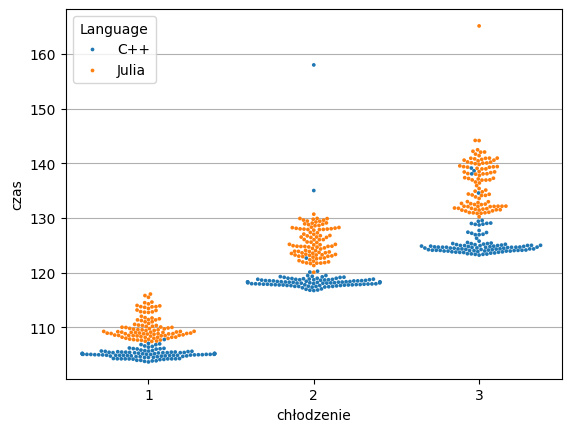

In [69]:
ax=sns.swarmplot(x='cooling',
             y='czas',
             hue='Language',
             data=dane_all,
             s=2.7)
ax.grid(axis='y')
ax.set(xlabel="chłodzenie");

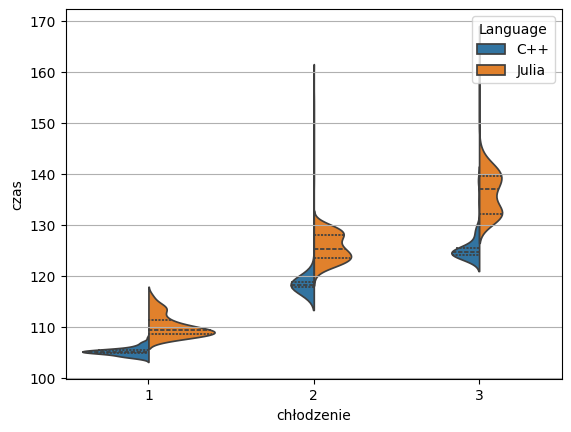

In [70]:
ax=sns.violinplot(x='cooling',
             y='czas',
             hue='Language',
             data=dane_all,
             split=True,
             inner='quart')
ax.set(xlabel="chłodzenie");
ax.grid(axis='y')

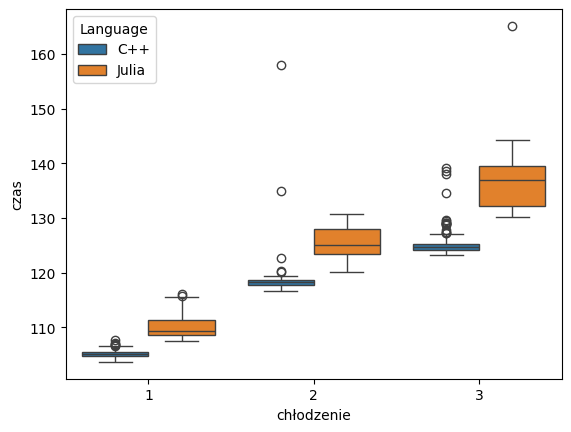

In [71]:
ax=sns.boxplot(x='cooling',
             y='czas',
             hue='Language',
             data=dane_all)
ax.set(xlabel="chłodzenie");

In [72]:
t_div = dane_czas['czas']-dane_czas1['czas']


In [90]:
t = pd.DataFrame({'t_div':t_div,
                  't_cpp':dane_czas['czas'],
                  't_julia':dane_czas1['czas'],
                 })
t['cooling'] = 3;
t['cooling'][:100] = 1;
t['cooling'][100:200]=2;

C:\Users\radom\AppData\Local\Temp\ipykernel_23220\2740653219.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  t['cooling'][:100] = 1;
C:\Users\radom\AppData\Local\Temp\ipykernel_23220\2740653219.py:6: SettingWithCopyWarning: 
A value is t

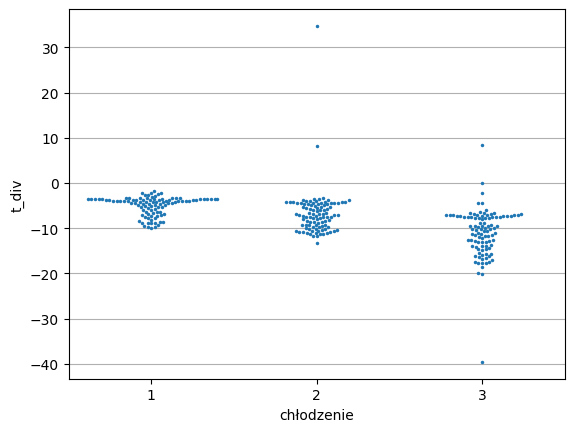

In [74]:
ax=sns.swarmplot(x = 'cooling',
            y='t_div',
              s=2.5,
             data=t);
ax.grid(axis='y')
ax.set(xlabel="chłodzenie");

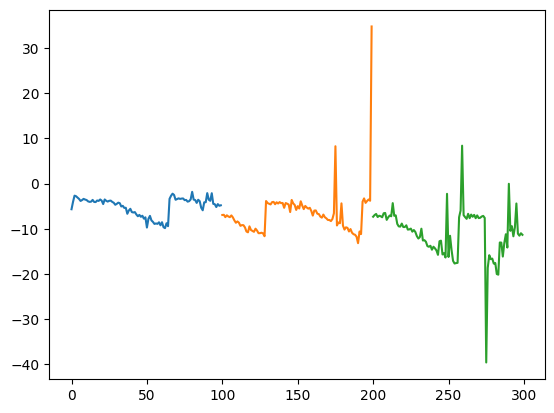

In [75]:
plt.plot(t['t_div'][:100]);
plt.plot(t['t_div'][100:200]);
plt.plot(t['t_div'][200:300]);

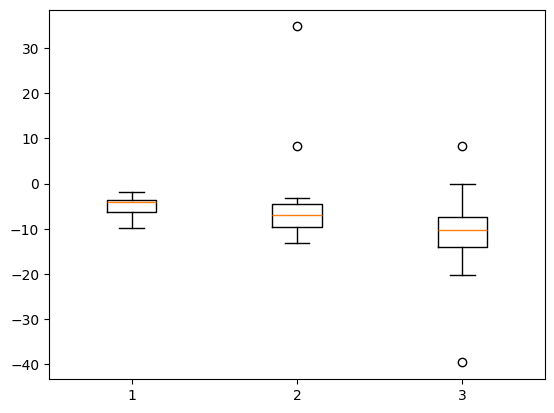

In [76]:
plt.boxplot([t_div[:100],
            t_div[100:200],
            t_div[200:300]]);


In [77]:
t['t_rel'] = t['t_div']/dane_czas['czas'] * 100
# t['t_rel']

[Text(0, 0.5, 't_rel [%]'), Text(0.5, 0, 'chłodzenie')]

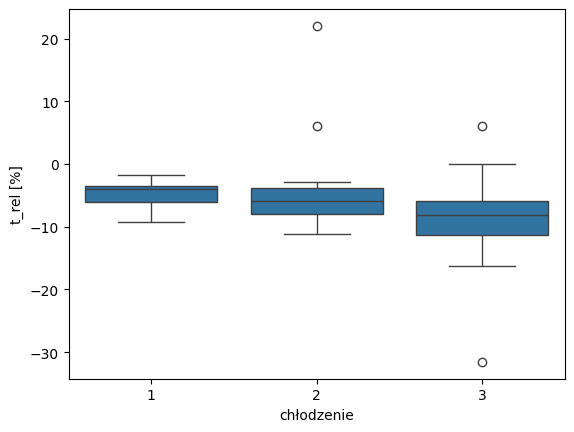

In [78]:
ax=sns.boxplot(x = 'cooling',
            y='t_rel',
#               s=2,
             data=t)
ax.set(ylabel="t_rel [%]",
       xlabel='chłodzenie')

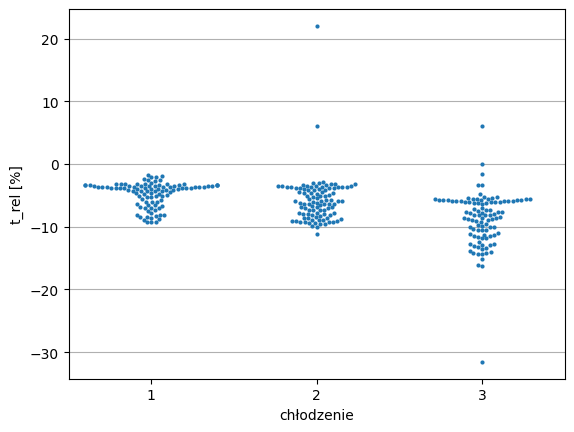

In [79]:
ax=sns.swarmplot(x='cooling',
              y='t_rel',
              data=t,
              s=3
             )
ax.set(ylabel="t_rel [%]",
       xlabel='chłodzenie')
ax.grid(axis='y')

In [80]:
t[t['t_rel']!=t['t_rel'][200:300].min()][200:].describe()

,t_div,t_cpp,t_julia,cooling,t_rel
count,99.000000,99.000000,99.000000,99.0,99.000000
mean,-10.654204,125.521859,136.176063,3.0,-8.532485
std,4.502190,2.932505,3.881079,0.0,3.611938
min,-20.159885,123.205000,130.241894,3.0,-16.255612
25%,-13.914056,124.081000,132.145468,3.0,-11.210063
50%,-10.189126,124.640000,136.919847,3.0,-8.145676
75%,-7.378522,125.259500,139.457967,3.0,-5.910512
max,8.382106,139.125000,144.177885,3.0,6.046648


In [81]:
t

,t_div,t_cpp,t_julia,cooling,t_rel
0,-5.681976,107.768,113.449976,1,-5.272415
1,-4.054124,105.212,109.266124,1,-3.853291
2,-2.676766,105.313,107.989766,1,-2.541725
3,-2.802801,105.166,107.968801,1,-2.665121
4,-3.107248,104.895,108.002248,1,-2.962246
...,...,...,...,...,...
295,-4.411117,134.562,138.973118,3,-3.278130
296,-11.093785,128.987,140.080785,3,-8.600700
297,-11.529604,128.717,140.246604,3,-8.957328
298,-10.991836,129.064,140.055836,3,-8.516578


In [82]:
t[['t_cpp', 't_julia', 't_div', 't_rel']][:100].describe()

,t_cpp,t_julia,t_div,t_rel
count,100.000000,100.000000,100.000000,100.000000
mean,105.133460,110.125540,-4.992080,-4.748806
std,0.767129,2.158668,2.031308,1.929230
min,103.669000,107.415952,-9.867235,-9.290132
25%,104.715750,108.533725,-6.314570,-5.993930
50%,105.054500,109.340113,-4.116133,-3.933768
75%,105.457500,111.354952,-3.606642,-3.433271
max,107.768000,116.079235,-1.829751,-1.710624


In [83]:
t[['t_cpp', 't_julia', 't_div', 't_rel']][100:200].describe()

,t_cpp,t_julia,t_div,t_rel
count,100.000000,100.000000,100.000000,100.000000
mean,118.830000,125.560551,-6.730551,-5.775827
std,4.367759,2.596940,5.156829,3.759288
min,116.725000,120.071549,-13.195020,-11.230474
25%,117.783750,123.357244,-9.521933,-8.017128
50%,118.239500,125.135581,-7.068105,-5.974416
75%,118.697500,127.962447,-4.603874,-3.884807
max,157.985000,130.688020,34.764484,22.004927


In [84]:
t[['t_cpp', 't_julia', 't_div', 't_rel']][200:300].describe()

,t_cpp,t_julia,t_div,t_rel
count,100.000000,100.000000,100.000000,100.000000
mean,125.521850,136.465479,-10.943629,-8.762619
std,2.917657,4.825638,5.333069,4.267372
min,123.205000,130.241894,-39.596658,-31.545843
25%,124.086000,132.146108,-13.983871,-11.255403
50%,124.644500,136.923948,-10.238028,-8.158031
75%,125.309500,139.590423,-7.392319,-5.912663
max,139.125000,165.117658,8.382106,6.046648


In [85]:
from scipy.stats import wilcoxon
from scipy.stats import shapiro

In [86]:
[wilcoxon(t['t_cpp'][:100], 
         t['t_julia'][:100],
          zero_method="wilcox"
         ),
 wilcoxon(t['t_cpp'][100:200], 
         t['t_julia'][100:200]
         ),
 wilcoxon(t['t_cpp'][200:300], 
         t['t_julia'][200:300]
         )]

[WilcoxonResult(statistic=0.0, pvalue=3.8965598450959084e-18),
 WilcoxonResult(statistic=162.0, pvalue=4.482425417016148e-16),
 WilcoxonResult(statistic=37.0, pvalue=1.1832715745334613e-17)]

In [87]:
[shapiro(t['t_cpp'][:100]),
 shapiro(t['t_cpp'][100:200]),
 shapiro(t['t_cpp'][200:300])]

[ShapiroResult(statistic=0.9603745341300964, pvalue=0.004276571329683065),
 ShapiroResult(statistic=0.23926717042922974, pvalue=2.0713297240795387e-20),
 ShapiroResult(statistic=0.6011455059051514, pvalue=4.525815621792342e-15)]

In [88]:
[shapiro(t['t_julia'][:100]),
 shapiro(t['t_julia'][100:200]),
 shapiro(t['t_julia'][200:300])]

[ShapiroResult(statistic=0.8850602507591248, pvalue=2.9903117138019297e-07),
 ShapiroResult(statistic=0.9600021839141846, pvalue=0.004022608511149883),
 ShapiroResult(statistic=0.8184065222740173, pvalue=9.481961882329415e-10)]